In [ ]:
'''
Vamos analisar dados referentes a campanhas de marketing direto de uma instituição
bancária portuguesa. As campanhas de marketing foram baseadas em ligações telefônicas.
Muitas vezes, era necessário mais de um contato para o mesmo cliente, a fim de saber se o
produto (depósito bancário a prazo) seria ('sim') ou não ('não') adquirido pelo cliente.
O dataset apresenta diversos problemas pois é um dataset com dados reais. Daremos
ênfase ao tratamento de valores ausentes, mas também faremos a limpeza e tratamento de
outros eventuais problemas que detectarmos
'''

In [ ]:
# Dados extraidos de: https://archive.ics.uci.edu/ml/datasets/bank+marketing

# Análise de Dados Para Campanhas de Marketing de Instituições Financeiras


In [ ]:
import pandas as pd
import numpy as np


In [ ]:
df = pd.read_csv('dataset.csv')

In [ ]:
# Imports

# Manipulação de dados
import pandas as pd
import numpy as np

# Visualização
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import missingno

# Estatística
import scipy
from scipy.stats import normaltest
from scipy.stats import chi2_contingency

# Engenharia de Atributos
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer

# Ignore Warning
import sys
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")

## Análise exploratória

In [ ]:
df.shape

(45211, 19)

In [ ]:
df.head()

customerid   age    salary  balance  marital                  jobedu  \
0           1  58.0  100000.0     2143  married     management,tertiary   
1           2  44.0   60000.0       29   single    technician,secondary   
2           3  33.0  120000.0        2  married  entrepreneur,secondary   
3           4  47.0   20000.0     1506  married     blue-collar,unknown   
4           5  33.0       0.0        1   single         unknown,unknown   

  targeted default housing loan  contact  day      month duration  campaign  \
0      yes      no     yes   no  unknown    5  may, 2017  261 sec         1   
1      yes      no     yes   no  unknown    5  may, 2017  151 sec         1   
2      yes      no     yes  yes  unknown    5  may, 2017   76 sec         1   
3       no      no     yes   no  unknown    5  may, 2017   92 sec         1   
4       no      no      no   no  unknown    5  may, 2017  198 sec         1   

   pdays  previous poutcome response  
0     -1         0  unknown       no  
1     -1         0  unknown       no  
2     -1         0  unknown       no  
3     -1         0  unknown       no  
4     -1         0  unknown       no

In [ ]:
df.describe().drop(columns=['customerid'])

age         salary        balance           day      campaign  \
count  45191.000000   45185.000000   45211.000000  45211.000000  45211.000000   
mean      40.935651   57008.653314    1362.272058     15.806419      2.763841   
std       10.619198   32086.028522    3044.765829      8.322476      3.098021   
min       18.000000       0.000000   -8019.000000      1.000000      1.000000   
25%       33.000000   20000.000000      72.000000      8.000000      1.000000   
50%       39.000000   60000.000000     448.000000     16.000000      2.000000   
75%       48.000000   70000.000000    1428.000000     21.000000      3.000000   
max       95.000000  120000.000000  102127.000000     31.000000     63.000000   

              pdays      previous  
count  45211.000000  45211.000000  
mean      40.197828      0.580323  
std      100.128746      2.303441  
min       -1.000000      0.000000  
25%       -1.000000      0.000000  
50%       -1.000000      0.000000  
75%       -1.000000      0.000000  
max      871.000000    275.000000

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 19 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   customerid  45211 non-null  int64  
 1   age         45191 non-null  float64
 2   salary      45185 non-null  float64
 3   balance     45211 non-null  int64  
 4   marital     45211 non-null  object 
 5   jobedu      45211 non-null  object 
 6   targeted    45211 non-null  object 
 7   default     45211 non-null  object 
 8   housing     45211 non-null  object 
 9   loan        45211 non-null  object 
 10  contact     45211 non-null  object 
 11  day         45211 non-null  int64  
 12  month       45161 non-null  object 
 13  duration    45211 non-null  object 
 14  campaign    45211 non-null  int64  
 15  pdays       45211 non-null  int64  
 16  previous    45211 non-null  int64  
 17  poutcome    45211 non-null  object 
 18  response    45181 non-null  object 
dtypes: float64(2), int64(6), 

In [ ]:
df.isnull().sum()

customerid     0
age           20
salary        26
balance        0
marital        0
jobedu         0
targeted       0
default        0
housing        0
loan           0
contact        0
day            0
month         50
duration       0
campaign       0
pdays          0
previous       0
poutcome       0
response      30
dtype: int64

In [ ]:
# Descrevendo somente os dados não-numéricos
df.describe(include = object)

marital               jobedu targeted default housing   loan  \
count     45211                45211    45211   45211   45211  45211   
unique        3                   48        2       2       2      2   
top     married  management,tertiary      yes      no     yes     no   
freq      27214                 7801    37091   44396   25130  37967   

         contact      month duration poutcome response  
count      45211      45161    45211    45211    45181  
unique         3         12     2646        4        2  
top     cellular  may, 2017  1.5 min  unknown       no  
freq       29285      13747      138    36959    39894

In [ ]:
# Removendo a coluna id, uma vez que não será util para nossa análise
df.drop(["customerid"], axis = 1, inplace = True)

In [ ]:
df.columns

Index(['age', 'salary', 'balance', 'marital', 'jobedu', 'targeted', 'default',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'response'],
      dtype='object')

> A coluna "jobedu" parece ter duas informações. Vamos separar em duas colunas.
A primeira informação está relacionada ao trabalho, e a seguna a escolaridade


In [ ]:
df[['job', 'edu']] = df['jobedu'].str.split(',', 1, expand=True)

<ipython-input-19-68c1d6fe5e44>:1: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  df[['job', 'edu']] = df['jobedu'].str.split(',', 1, expand=True)


In [ ]:
df.head()

age    salary  balance  marital targeted default housing loan  contact  \
0  58.0  100000.0     2143  married      yes      no     yes   no  unknown   
1  44.0   60000.0       29   single      yes      no     yes   no  unknown   
2  33.0  120000.0        2  married      yes      no     yes  yes  unknown   
3  47.0   20000.0     1506  married       no      no     yes   no  unknown   
4  33.0       0.0        1   single       no      no      no   no  unknown   

   day      month duration  campaign  pdays  previous poutcome response  \
0    5  may, 2017  261 sec         1     -1         0  unknown       no   
1    5  may, 2017  151 sec         1     -1         0  unknown       no   
2    5  may, 2017   76 sec         1     -1         0  unknown       no   
3    5  may, 2017   92 sec         1     -1         0  unknown       no   
4    5  may, 2017  198 sec         1     -1         0  unknown       no   

            job        edu  
0    management   tertiary  
1    technician  secondary  
2  entrepreneur  secondary  
3   blue-collar    unknown  
4       unknown    unknown

In [ ]:
df['job'].value_counts()

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

In [ ]:
df['edu'].value_counts()

secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: edu, dtype: int64

In [ ]:
# Agora que fizemos a separação dos dados, podemos remover a coluna jobedu
df.drop(['jobedu'], axis=1, inplace = True)

## Tratamento de Valores Ausentes


> Tratando da variavel IDADE

In [ ]:
df.isnull().sum()

age         20
salary      26
balance      0
marital      0
targeted     0
default      0
housing      0
loan         0
contact      0
day          0
month       50
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
response    30
job          0
edu          0
dtype: int64

In [ ]:
# Calculando o percentual de valores ausentes da variavel age
df.age.isnull().mean()*100

0.0442370219636814

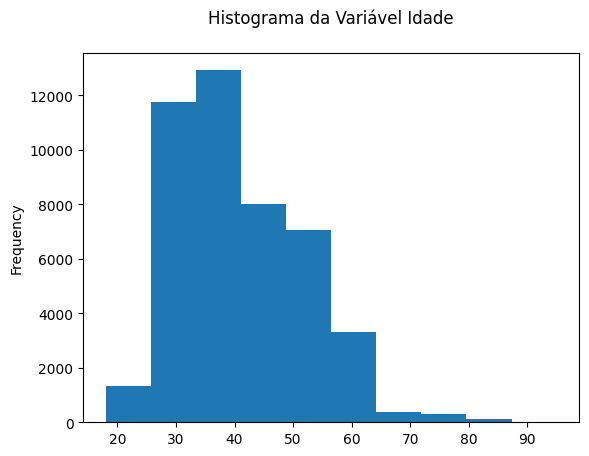

In [ ]:
# Criando um histograma para a coluna age
df.age.plot(kind='hist')
plt.title('Histograma da Variável Idade\n')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

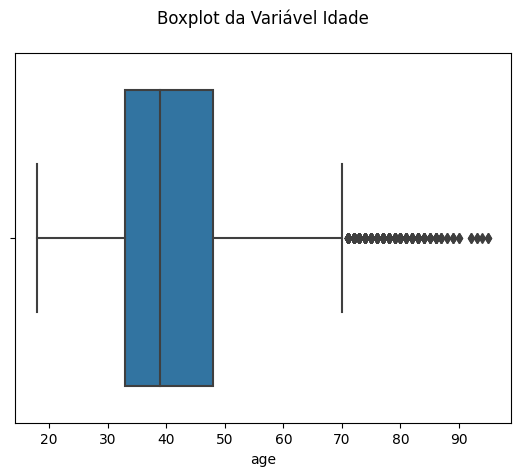

In [ ]:
# Boxplot da variável age
sns.boxplot(x = df.age)
plt.title('Boxplot da Variável Idade\n')
plt.show

Opitarei por não imputar a média por que há muitos outliers, o que influencia a média.

In [ ]:
df['age'].describe()

count    45191.000000
mean        40.935651
std         10.619198
min         18.000000
25%         33.000000
50%         39.000000
75%         48.000000
max         95.000000
Name: age, dtype: float64

Vamos imputar os valores ausentes da váriavel 'age' com a mediana, e depois transformar os tipos de dados em int

In [ ]:
df['age'].value_counts()

32.0    2085
31.0    1994
33.0    1972
34.0    1929
35.0    1892
        ... 
93.0       2
90.0       2
95.0       2
88.0       2
94.0       1
Name: age, Length: 77, dtype: int64

In [ ]:
median = df['age'].median()

In [ ]:
df['age'] = df['age'].fillna(32)

In [ ]:
df['age'] = df['age'].round().astype(int)

In [ ]:
df['age'].describe()

count    45211.000000
mean        40.934795
std         10.616926
min         18.000000
25%         33.000000
50%         39.000000
75%         48.000000
max         95.000000
Name: age, dtype: float64

In [ ]:
df['age'].describe()

count    45211.000000
mean        40.934795
std         10.616926
min         18.000000
25%         33.000000
50%         39.000000
75%         48.000000
max         95.000000
Name: age, dtype: float64

> Tratando da variável mês

In [ ]:
df.month.isnull().sum()

50

In [ ]:
df.month.isnull().mean()*100

0.11059255490920351

Como o percentual é menor que 30% não podemos eliminar a coluna. Podemos então eliminar os registros com valores ausentes (nesse caso perderíamos 50 linhas no dataset) ou podemos aplicar imputação. Vamos usar a segunda opção.


In [ ]:
df.month.value_counts()

may, 2017    13747
jul, 2017     6888
aug, 2017     6240
jun, 2017     5335
nov, 2017     3968
apr, 2017     2931
feb, 2017     2646
jan, 2017     1402
oct, 2017      738
sep, 2017      576
mar, 2017      476
dec, 2017      214
Name: month, dtype: int64

In [ ]:
 df.month.mode()

0    may, 2017
Name: month, dtype: object

In [ ]:
df.month.fillna('may, 2017', inplace=True)

In [ ]:
df.month.isnull().sum()

0

> Vamos agora tratar a variável que representa o salário.

In [ ]:
df.salary.isnull().sum()

26

In [ ]:
df.salary.isnull().mean()*100

0.05750812855278583

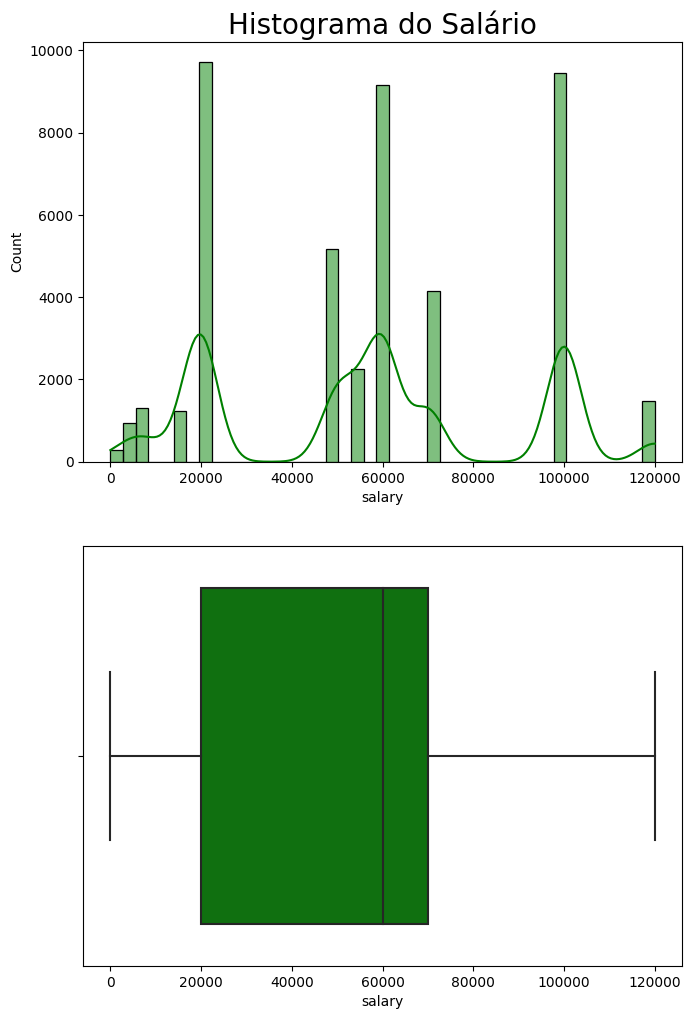

In [ ]:
# Figura
plt.figure(figsize = (17,12))

# Subplots com histogramas
# 221 = 2 linhas, 2 colunas, grafico 1; e assim sucessivamente
plt.subplot(221)
# Definindo paleta de cor
sns.color_palette("hls", 8)
# Kde = linha de densidade
sns.histplot(df['salary'], kde = True, color = "green")
plt.title('Histograma do Salário', fontsize = 20)

plt.subplot(223)
sns.boxplot(x=df['salary'], color = "green")


plt.show()

In [ ]:
df.salary.describe()

count     45185.000000
mean      57008.653314
std       32086.028522
min           0.000000
25%       20000.000000
50%       60000.000000
75%       70000.000000
max      120000.000000
Name: salary, dtype: float64

Existe salário igual a zero?

In [ ]:
df.salary.value_counts()

20000.0     9725
100000.0    9454
60000.0     9169
50000.0     5167
70000.0     4153
55000.0     2264
120000.0    1486
8000.0      1303
16000.0     1239
4000.0       937
0.0          288
Name: salary, dtype: int64

Vamos verificar qual o emprego daqueles que afirmaram ter o salário igual a 0


In [ ]:
nan_index = (df[df['salary'] == 0]).index.tolist()

In [ ]:
len(nan_index)

288

In [ ]:
nan_index

Int64Index([    4,   216,   354,   876,  1072,  1292,  2046,  2723,  2841,
             2848,
            ...
            44405, 44544, 44651, 44656, 44681, 44714, 44742, 44970, 45141,
            45186],
           dtype='int64', length=288)

In [ ]:
df.loc[nan_index, 'job'].value_counts()

unknown    288
Name: job, dtype: int64

## Nesse caso, foi identificado que aqueles cujo o salário é 0 também indicam que o trabalho é 'desconhecido'. Nesse caso seria interessante conversar com a área de onde os dados foram submetidos para entender o que pode ter acontecido e qual a melhor forma de resolver, como não temos essa oportunidade no momento, optarei por substituir pela mediana


Como os dados (via boxplot) indicam ser assimetricos, não optaremos pela média e mais uma vez usaremos a mediana para imputar os valores ausentes em salário


In [ ]:
median_salary = df.salary.median()

In [ ]:
median_salary

60000.0

In [ ]:
df.salary.fillna(median_salary, inplace = True)

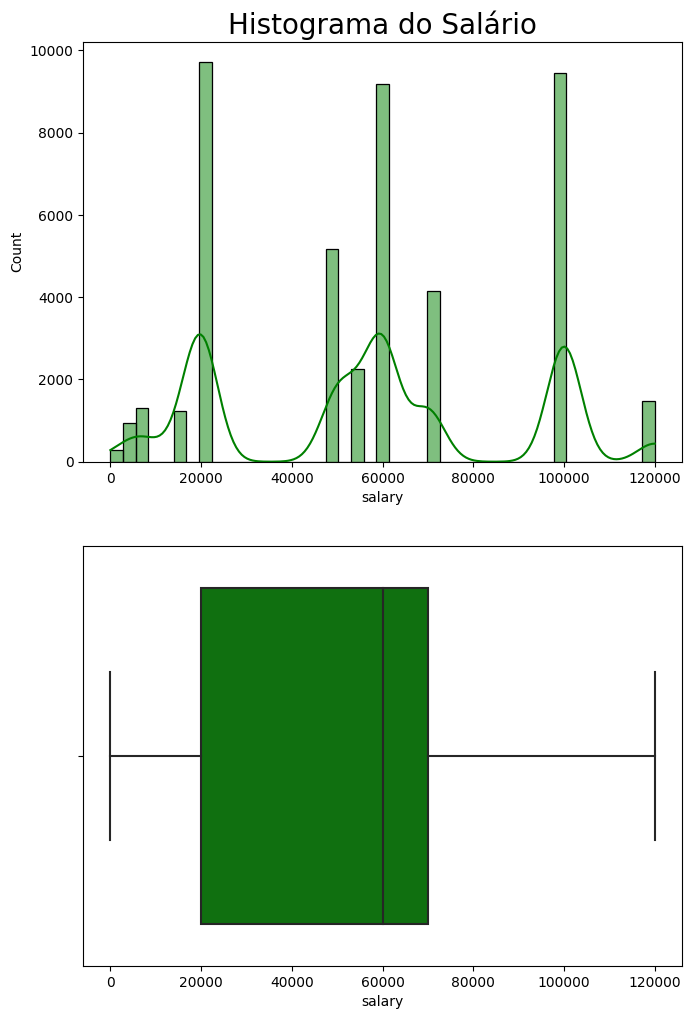

In [ ]:
# Figura
plt.figure(figsize = (17,12))

# Subplots com histogramas
# 221 = 2 linhas, 2 colunas, grafico 1; e assim sucessivamente
plt.subplot(221)
# Definindo paleta de cor
sns.color_palette("hls", 8)
# Kde = linha de densidade
sns.histplot(df['salary'], kde = True, color = "green")
plt.title('Histograma do Salário', fontsize = 20)

plt.subplot(223)
sns.boxplot(x=df['salary'], color = "green")


plt.show()

Messe caso, foi identificado que aqueles cujo o salário é 0 também indicam que o trabalho é 'desconhecido'. Nesse caso seria interessante conversar com a área de onde os dados foram submetidos para entender o que pode ter acontecido e qual a melhor forma de resolver, como não temos essa oportunidade no momento, optarei por substituir pela mediana


In [ ]:
df['salary'] = df['salary'].replace(0, median_salary)

In [ ]:
df.salary.value_counts()

20000.0     9725
60000.0     9483
100000.0    9454
50000.0     5167
70000.0     4153
55000.0     2264
120000.0    1486
8000.0      1303
16000.0     1239
4000.0       937
Name: salary, dtype: int64

In [ ]:
df.salary.isnull().mean()*100

0.0

> Trataremos agora da variável response (variável alvo) -

In [ ]:
df.response.isnull().sum()

30

In [ ]:
df.response.isnull().mean()*100

0.0663555329455221

In [ ]:
# Não vamos aplicar imputação na variável de estudo (variável resposta ou variável alvo)
# Uma vez que ainda não tenho conhecimento o suficiente para aplicar um aprendizado de máquina (machine learning) para poder determinar o que leva de fato ao cliente a comprar o serviço
# optarei pela exclusão das linhas de dados ausentes (30 linhas) uma vez que são poucos dados ausentes e não podemos determinar uma imputação visto que pode interferir na análise.
df.dropna(subset = ["response"], inplace = True)

In [ ]:
df.response.isnull().sum()

0

In [ ]:
df.isnull().sum()

age         0
salary      0
balance     0
marital     0
targeted    0
default     0
housing     0
loan        0
contact     0
day         0
month       0
duration    0
campaign    0
pdays       0
previous    0
poutcome    0
response    0
job         0
edu         0
dtype: int64

> Tratando a variável pdays (tempo para pagar o produto):

quando vemos a descrição da var pdays, notamos que há o valor '-1' e como seria possivel pagar o produto em -1 dias? Não é possível. Devemos tratar esses dados

In [ ]:
df.pdays.isnull().sum()

0

In [ ]:
df.pdays.describe()

count    45181.000000
mean        40.198601
std        100.134050
min         -1.000000
25%         -1.000000
50%         -1.000000
75%         -1.000000
max        871.000000
Name: pdays, dtype: float64

In [ ]:
df.pdays = df.pdays.replace({-1.0:np.NaN})

In [ ]:
df.pdays.isnull().sum()

36930

In [ ]:
df.pdays.isnull().mean()*100

81.73789867422147

Como existe uma enorme quantidade de valores ausentes, faremos a exclusão dessa coluna, visto que fica impossivel de análisar com tal quantidade ausente


In [ ]:
df.drop(['pdays'], axis=1, inplace=True)

In [ ]:
df.isnull().sum()

age         0
salary      0
balance     0
marital     0
targeted    0
default     0
housing     0
loan        0
contact     0
day         0
month       0
duration    0
campaign    0
previous    0
poutcome    0
response    0
job         0
edu         0
dtype: int64

# Conclusão e Análise de Dados


### Análise Univariada


In [ ]:
# Proporção da variável de estado civil
df.marital.value_counts(normalize = True)

married     0.601912
single      0.282907
divorced    0.115181
Name: marital, dtype: float64

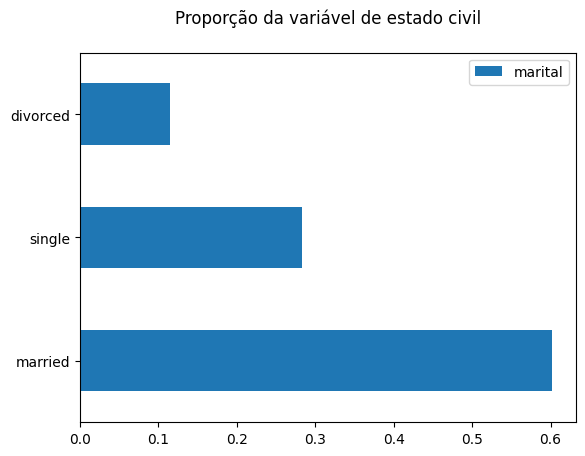

In [ ]:
# Plot
df.marital.value_counts(normalize = True).plot(kind = "barh")
plt.title("Proporção da variável de estado civil\n")
plt.legend()
plt.show()

In [ ]:
# Proporção da variável de job
df.job.value_counts(normalize = True)

blue-collar      0.215290
management       0.209247
technician       0.168035
admin.           0.114340
services         0.091853
retired          0.050087
self-employed    0.034860
entrepreneur     0.032890
unemployed       0.028840
housemaid        0.027423
student          0.020761
unknown          0.006374
Name: job, dtype: float64

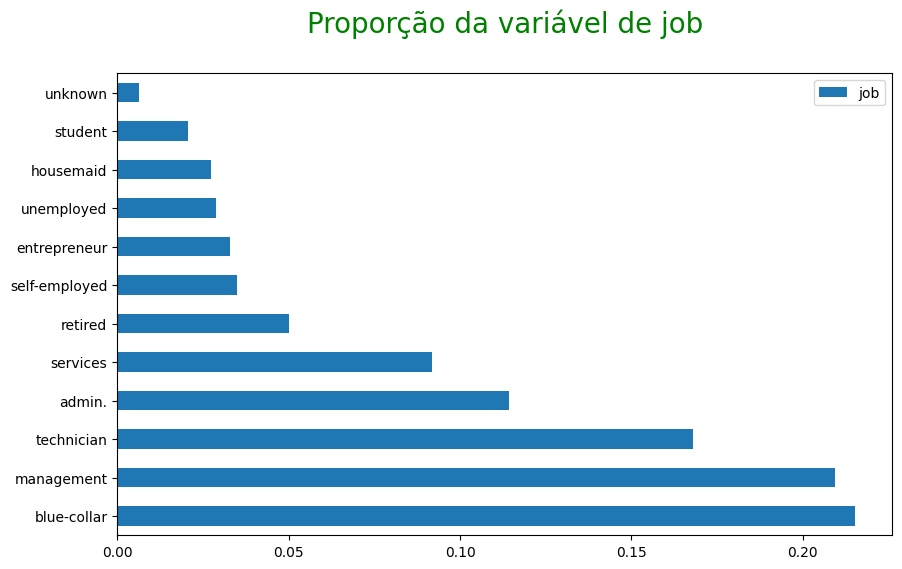

In [ ]:
# Plot
plt.figure(figsize = (10,6))
df.job.value_counts(normalize = True).plot(kind = "barh")
plt.title("Proporção da variável de job\n", fontdict = {'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})
plt.legend()
plt.show()

In [ ]:
# Proporção da variável de education
df.edu.value_counts(normalize = True)

secondary    0.513247
tertiary     0.294194
primary      0.151480
unknown      0.041079
Name: edu, dtype: float64

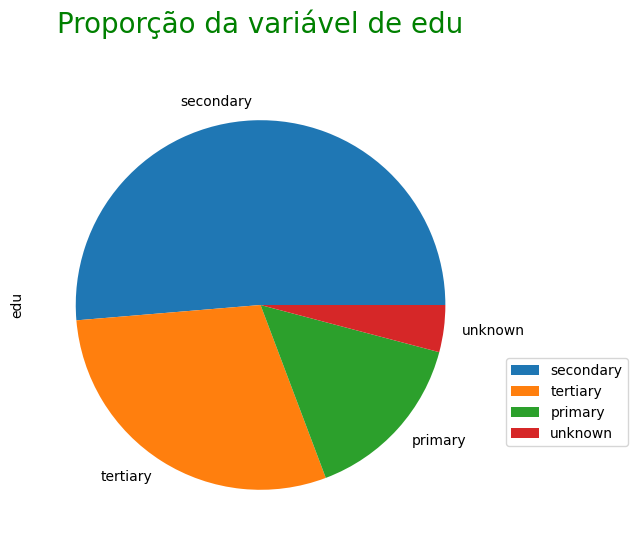

In [ ]:
# Plot
plt.figure(figsize = (10,6))
df.edu.value_counts(normalize = True).plot(kind = "pie")
plt.title("Proporção da variável de edu\n", fontdict = {'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})
plt.legend()
plt.legend(bbox_to_anchor=(1.31,0.4))
plt.show()

In [ ]:
# Proporção da variável response
df.response.value_counts(normalize = True)

no     0.882982
yes    0.117018
Name: response, dtype: float64

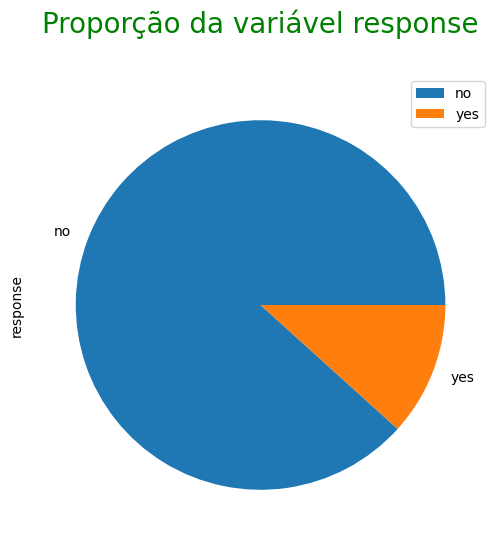

In [ ]:
# Plot
plt.figure(figsize = (10,6))
df.response.value_counts(normalize = True).plot(kind = "pie")
plt.title("Proporção da variável response\n", fontdict = {'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})
plt.legend()
plt.show()

### Análise Multivariada


In [ ]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

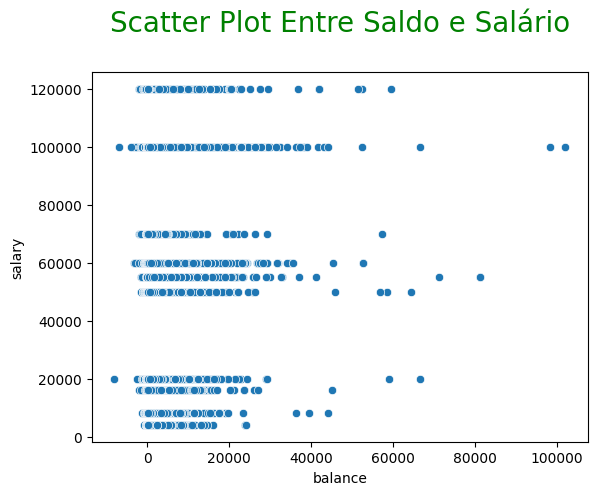

In [ ]:
# Scatter Plot
sns.scatterplot(x=df["balance"], y=df["salary"])
plt.title("Scatter Plot Entre Saldo e Salário\n", fontdict = {'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})
plt.show()

# As duas variaveis parece não estar diretamente relacionada

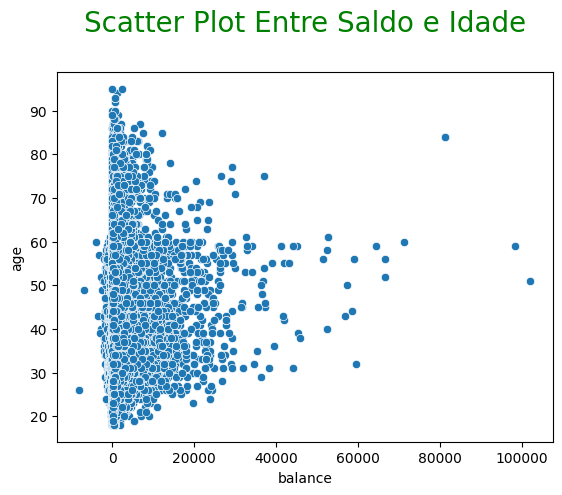

In [ ]:
# Scatter Plot
sns.scatterplot(x=df["balance"], y=df["age"])
plt.title("Scatter Plot Entre Saldo e Idade\n", fontdict = {'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})
plt.show()

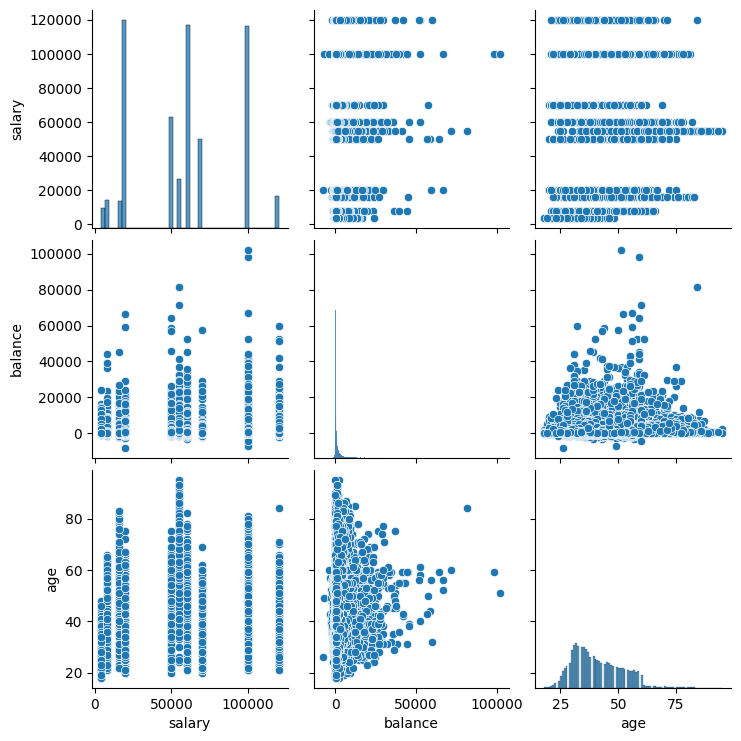

In [ ]:
# Pair Plot
sns.pairplot(df[["salary","balance","age"]])
plt.show()

In [ ]:
# Calcula a correlação
res = df[["salary", "balance", "age"]].corr()

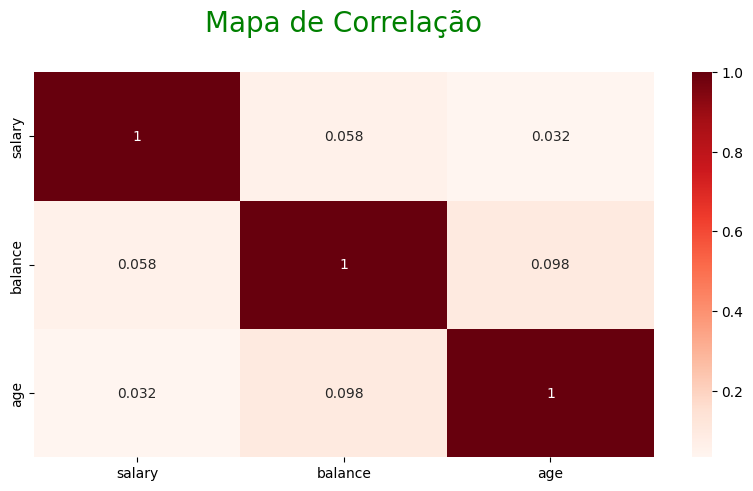

In [ ]:
# Mapa de Correlação
plt.figure(figsize = (10,5))
sns.heatmap(res, annot = True, cmap = "Reds")
plt.title("Mapa de Correlação\n", fontdict = {'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})
plt.show()

### Numérico x Categórico

In [ ]:
# Agrupa o salário pela variável resposta e calcula a média
df.groupby(by = ["response"])["salary"].mean()

response
no     57157.692886
yes    59157.556270
Name: salary, dtype: float64

In [ ]:
# Agrupa o salário pela variável resposta e calcula a mediana
df.groupby(by = ["response"])["salary"].median()

response
no     60000.0
yes    60000.0
Name: salary, dtype: float64

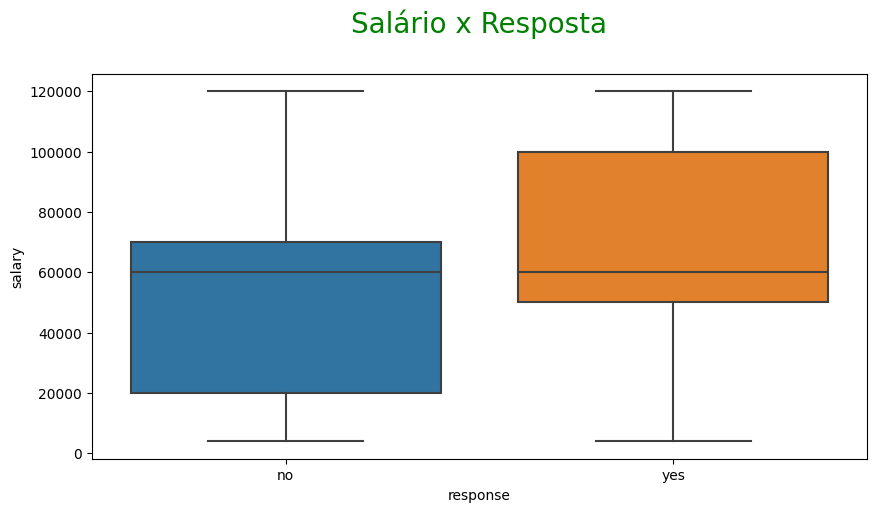

In [ ]:
# Boxplot
plt.figure(figsize = (10,5))
sns.boxplot(x=df["response"], y=df["salary"])
plt.title("Salário x Resposta\n", fontdict = {'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})
plt.show()

In [ ]:
# Agrupa educação por salário e calcula a média
df.groupby(by = ["edu"])["salary"].mean()

edu
primary      34697.106955
secondary    49922.420113
tertiary     83041.077340
unknown      50708.512931
Name: salary, dtype: float64

In [ ]:
# Cria a variável response_flag como tipo numérico onde response "yes"= 1, "no"= 0
df["response_flag"] = np.where(df["response"] == "yes",1,0)
df.head()

age    salary  balance  marital targeted default housing loan  contact  \
0   58  100000.0     2143  married      yes      no     yes   no  unknown   
1   44   60000.0       29   single      yes      no     yes   no  unknown   
2   33  120000.0        2  married      yes      no     yes  yes  unknown   
3   47   20000.0     1506  married       no      no     yes   no  unknown   
4   33   60000.0        1   single       no      no      no   no  unknown   

   day      month duration  campaign  previous poutcome response  \
0    5  may, 2017  261 sec         1         0  unknown       no   
1    5  may, 2017  151 sec         1         0  unknown       no   
2    5  may, 2017   76 sec         1         0  unknown       no   
3    5  may, 2017   92 sec         1         0  unknown       no   
4    5  may, 2017  198 sec         1         0  unknown       no   

            job        edu  response_flag  
0    management   tertiary              0  
1    technician  secondary              0  
2  entrepreneur  secondary              0  
3   blue-collar    unknown              0  
4       unknown    unknown              0

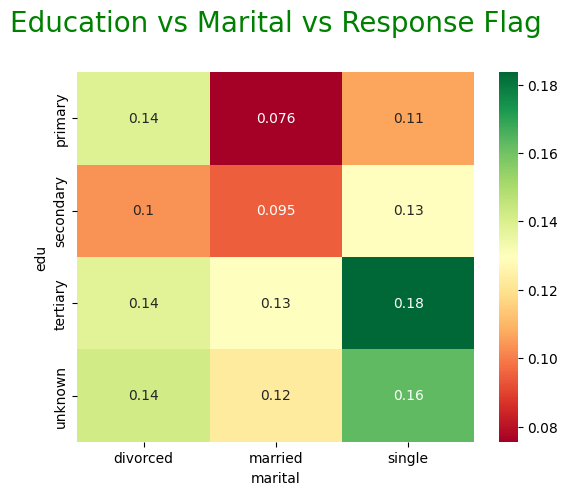

In [ ]:
# Mapa de correlação
res1 = df.pivot_table(index = "edu", columns = "marital", values = "response_flag", aggfunc = "mean")
sns.heatmap(res1, annot = True, cmap = "RdYlGn")
plt.title("Education vs Marital vs Response Flag\n", fontdict = {'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})
plt.show()

# Relatório


Este projeto teve como objetivo principal o tratamento de valores ausentes em um conjunto de dados, utilizando técnicas específicas de acordo com a natureza e necessidades de cada variável.

Estratégias de Tratamento de Valores Ausentes
**negrito**
Foram empregadas duas técnicas principais para lidar com valores ausentes:

**Imputação:**

* A técnica de imputação foi aplicada, onde os valores ausentes foram preenchidos com estatísticas descritivas, como média, moda ou mediana, garantindo a preservação das características centrais da distribuição.

**Backward Fill (bfill) / Forward Fill (ffill):**

* Para outras variáveis, utilizou-se a técnica de preenchimento backward (bfill) e forward (ffill), onde os valores ausentes foram preenchidos com os valores adjacentes da mesma variável.

**Justificativas e Escolhas**

Todas as escolhas de técnicas foram criteriosamente justificadas ao longo do código, levando em consideração a natureza dos dados e a preservação da integridade das informações. As estratégias escolhidas visaram minimizar o impacto nos resultados finais da análise.

**Foco no Tratamento de Valores Ausentes**

O projeto manteve um foco central no tratamento de valores ausentes, reconhecendo a importância dessa etapa na garantia da qualidade e confiabilidade dos resultados obtidos na análise subsequente. A abordagem adotada reflete as melhores práticas e padrões estabelecidos para o tratamento desses casos.

**Análise de Resultados**

Ao final do tratamento, foi realizada uma análise exploratória para identificar possíveis padrões relacionados à aquisição do produto pelos clientes. Uma observação interessante foi a forte correlação entre clientes solteiros e com ensino superior, sugerindo que esses grupos podem ter uma maior propensão à aquisição do produto.

**Conclusão**

O projeto não apenas atendeu ao objetivo principal de tratamento de valores ausentes, mas também proporcionou insights valiosos sobre fatores correlacionados à decisão de compra dos clientes. A integridade dos dados foi preservada, e as escolhas metodológicas foram documentadas de maneira transparente, garantindo a reproducibilidade e entendimento do processo.

Este relatório resume o contexto, abordagem e resultados obtidos durante o projeto de tratamento de valores ausentes, fornecendo uma base sólida para análises subsequentes e tomadas de decisão.